<a href="https://colab.research.google.com/github/Shridat/Human-Emotion-Classification-/blob/main/Human_Emotion_Text_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [9]:
data = pd.read_table('/content/train.txt',delimiter=";")

In [10]:
data.head()

,Text,Sentiment
0,i didnt feel humiliated,sadness
1,i can go from feeling so hopeless to so damned...,sadness
2,im grabbing a minute to post i feel greedy wrong,anger
3,i am ever feeling nostalgic about the fireplac...,love
4,i am feeling grouchy,anger


In [11]:
data.shape

(27896, 2)

In [12]:
data['Sentiment'].unique()

array(['sadness', 'anger', 'love', 'surprise', 'fear', 'joy'],
      dtype=object)

In [13]:
Total = data.isnull().sum().sort_values(ascending=False)
Percentage = ((data.isnull().sum())/(data.isnull().count())).sort_values(ascending=False)
missing_values = pd.concat([Total,Percentage],keys=['Total','Percentage'],axis=1)
missing_values

,Total,Percentage
Text,0,0.0
Sentiment,0,0.0


In [14]:
from nltk.stem import PorterStemmer
from nltk.corpus import stopwords

In [20]:
ps = PorterStemmer()
corpus = []

In [16]:
#Data Preprocessing Step

In [21]:
for i in range(len(data)):
  text = re.sub('[^a-zA-Z]',' ',data['Text'][i])
  text = text.lower()
  text = text.split()
  text = [ps.stem(words) for words in text if words not in stopwords.words('english')]
  text = " ".join(text)
  corpus.append(text)

In [22]:
corpus[:20]

['didnt feel humili',
 'go feel hopeless damn hope around someon care awak',
 'im grab minut post feel greedi wrong',
 'ever feel nostalg fireplac know still properti',
 'feel grouchi',
 'ive feel littl burden late wasnt sure',
 'ive take milligram time recommend amount ive fallen asleep lot faster also feel like funni',
 'feel confus life teenag jade year old man',
 'petrona year feel petrona perform well made huge profit',
 'feel romant',
 'feel like make suffer see mean someth',
 'feel run divin experi expect type spiritu encount',
 'think easiest time year feel dissatisfi',
 'feel low energi thirsti',
 'immens sympathi gener point possibl proto writer tri find time write corner life sign agent let alon publish contract feel littl preciou',
 'feel reassur anxieti side',
 'didnt realli feel embarrass',
 'feel pretti pathet time',
 'start feel sentiment doll child began collect vintag barbi doll sixti',
 'feel compromis skeptic valu everi unit work put']

In [23]:
#Importing all neccessary Tensorflow Libraries

In [24]:
import tensorflow as tf
tf.__version__

'2.8.2'

In [28]:
from tensorflow.keras.layers import Embedding
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.text import one_hot
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout

In [26]:
voc_size=5000
one_hot_rep = [one_hot(words,voc_size) for words in corpus]
one_hot_rep[:10]

[[339, 2121, 3528],
 [3775, 2121, 426, 3364, 3358, 1985, 841, 883, 2154],
 [446, 2210, 2135, 926, 2121, 1794, 3166],
 [3091, 2121, 2733, 765, 1301, 2851, 4287],
 [2121, 2116],
 [2354, 2121, 3854, 2274, 683, 151, 3392],
 [2354,
  1575,
  3927,
  1953,
  4662,
  3620,
  2354,
  4208,
  1396,
  1549,
  3883,
  4509,
  2121,
  2928,
  2107],
 [2121, 303, 4006, 283, 2909, 3558, 597, 2312],
 [4692, 3558, 2121, 4692, 374, 3952, 2704, 2519, 3855],
 [2121, 2519]]

In [47]:
sent_len = 20
embedded_docs = pad_sequences(one_hot_rep,padding="pre",maxlen=sent_len)
embedded_docs[:10]

array([[   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,  339, 2121, 3528],
       [   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
        3775, 2121,  426, 3364, 3358, 1985,  841,  883, 2154],
       [   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,  446, 2210, 2135,  926, 2121, 1794, 3166],
       [   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0, 3091, 2121, 2733,  765, 1301, 2851, 4287],
       [   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0, 2121, 2116],
       [   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0, 2354, 2121, 3854, 2274,  683,  151, 3392],
       [   0,    0,    0,    0,    0, 2354, 1575, 3927, 1953, 4662, 3620,
        2354, 4208, 1396, 1549, 3883, 4509, 2121, 2928, 2107],
       [   0,    0,    0,    0,    0,    

**Model Building**

> Indented block



In [48]:
feature_size=40
model = Sequential()
model.add(Embedding(voc_size,feature_size,input_length=sent_len))
model.add(LSTM(128,input_shape=(embedded_docs.shape),activation="relu",return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(128,activation="relu"))
model.add(Dropout(0.2))
model.add(Dense(32,activation="relu"))
model.add(Dropout(0.2))
model.add(Dense(6,activation="softmax"))
model.compile(loss="categorical_crossentropy",optimizer="Adam",metrics=['accuracy'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 20, 40)            200000    
                                                                 
 lstm_2 (LSTM)               (None, 20, 128)           86528     
                                                                 
 dropout_3 (Dropout)         (None, 20, 128)           0         
                                                                 
 lstm_3 (LSTM)               (None, 128)               131584    
                                                                 
 dropout_4 (Dropout)         (None, 128)               0         
                                                                 
 dense_2 (Dense)             (None, 32)                4128      
                                                                 
 dropout_5 (Dropout)         (None, 32)               

In [49]:
import numpy as np


In [50]:
X = np.array(embedded_docs)
Y = np.array(data['Sentiment'])

In [51]:
X.shape,Y.shape

((27896, 20), (27896,))

**Encode The labels **

In [52]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
Y = le.fit_transform(Y)

In [53]:
Y

array([4, 4, 0, ..., 2, 0, 4])

**Change Dimension Of Output Variable**

In [54]:
from tensorflow.keras.utils import to_categorical

In [55]:
Y = to_categorical(Y,6)

**Split Data into Train and Test**

In [56]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size=0.2,random_state=42)

**Train the model**

In [57]:
model.fit(x_train,y_train,validation_data=(x_test,y_test),epochs=10,batch_size=64,verbose=1)

Epoch 1/10
349/349 [==============================] - 49s 130ms/step - loss: 1.4027 - accuracy: 0.4122 - val_loss: 0.8801 - val_accuracy: 0.6690
Epoch 2/10
349/349 [==============================] - 37s 106ms/step - loss: 0.6506 - accuracy: 0.7507 - val_loss: 0.4587 - val_accuracy: 0.8400
Epoch 3/10
349/349 [==============================] - 38s 109ms/step - loss: 0.3747 - accuracy: 0.8703 - val_loss: 0.3913 - val_accuracy: 0.8717
Epoch 4/10
349/349 [==============================] - 38s 109ms/step - loss: 0.2978 - accuracy: 0.8990 - val_loss: 0.3409 - val_accuracy: 0.8892
Epoch 5/10
349/349 [==============================] - 37s 107ms/step - loss: 0.2319 - accuracy: 0.9218 - val_loss: 0.3654 - val_accuracy: 0.8903
Epoch 6/10
349/349 [==============================] - 38s 109ms/step - loss: 0.2024 - accuracy: 0.9330 - val_loss: 0.3447 - val_accuracy: 0.9014
Epoch 7/10
349/349 [==============================] - 37s 106ms/step - loss: 0.1760 - accuracy: 0.9394 - val_loss: 0.3222 - val_ac

In [58]:
pred = model.predict(x_test)

In [64]:
y_pred = np.argmax(pred,axis=1)

In [71]:
print(y_pred)
print("---------")
print(np.argmax(y_test,axis=1))
y_test = np.argmax(y_test,axis=1)

[0 0 4 ... 4 2 2]
---------
[0 0 4 ... 4 2 2]


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


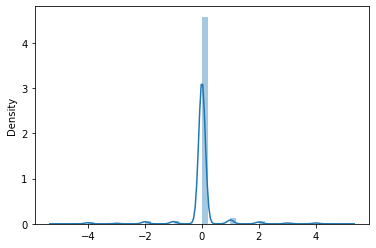

In [72]:
sns.distplot(y_pred-y_test)

In [73]:
from sklearn.metrics import accuracy_score,confusion_matrix
ac = accuracy_score(y_test,y_pred)
print("Accuracy Score : ",ac)

Accuracy Score :  0.9161290322580645


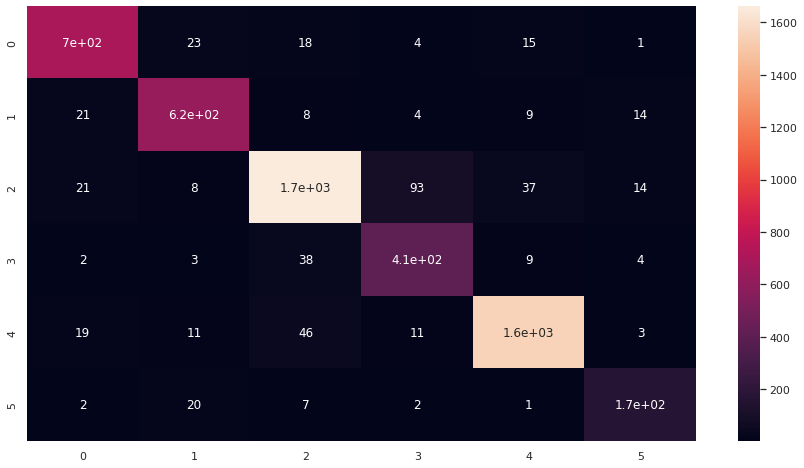

In [75]:
cf = confusion_matrix(y_test,y_pred)
sns.set(rc = {'figure.figsize':(15,8)})
sns.heatmap(cf,annot=True)